In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

## 2022 PROJE HOMEWORK

In [6]:
#Açıklama için https://github.com/owid/covid-19-data/tree/master/public/data
df=pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

### Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202644 entries, 0 to 202643
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    202644 non-null  object 
 1   continent                                   190907 non-null  object 
 2   location                                    202644 non-null  object 
 3   date                                        202644 non-null  object 
 4   total_cases                                 194578 non-null  float64
 5   new_cases                                   194324 non-null  float64
 6   new_cases_smoothed                          193147 non-null  float64
 7   total_deaths                                175877 non-null  float64
 8   new_deaths                                  175861 non-null  float64
 9   new_deaths_smoothed                         174699 non-null  float64
 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,194578.0,3.679286e+06,2.310784e+07,1.000000,3181.000000,39736.000000,423484.250000,5.667836e+08
new_cases,194324.0,1.245415e+04,8.700957e+04,0.000000,0.000000,66.000000,1012.000000,4.079558e+06
new_cases_smoothed,193147.0,1.244245e+04,8.496512e+04,0.000000,6.714000,100.143000,1134.714000,3.438025e+06
total_deaths,175877.0,6.797721e+04,3.527580e+05,1.000000,101.000000,996.000000,8948.000000,6.380811e+06
new_deaths,175861.0,1.505111e+02,7.685493e+02,0.000000,0.000000,1.000000,16.000000,1.815200e+04
...,...,...,...,...,...,...,...,...
human_development_index,162485.0,7.250504e-01,1.497129e-01,0.394000,0.602000,0.743000,0.845000,9.570000e-01
excess_mortality_cumulative_absolute,6846.0,4.308325e+04,1.197462e+05,-37726.100000,-14.500000,4815.300000,30622.675000,1.219078e+06
excess_mortality_cumulative,6846.0,9.327044e+00,1.412743e+01,-28.450000,-0.180000,6.785000,15.080000,7.655000e+01
excess_mortality,6846.0,1.441278e+01,2.792296e+01,-95.920000,-0.460000,7.090000,20.825000,3.757900e+02


In [9]:
df_new = df[['date','new_cases','new_deaths','new_vaccinations','location','continent']]

In [10]:
df_new.head()

,date,new_cases,new_deaths,new_vaccinations,location,continent
0,2020-02-24,5.0,NaN,NaN,Afghanistan,Asia
1,2020-02-25,0.0,NaN,NaN,Afghanistan,Asia
2,2020-02-26,0.0,NaN,NaN,Afghanistan,Asia
3,2020-02-27,0.0,NaN,NaN,Afghanistan,Asia
4,2020-02-28,0.0,NaN,NaN,Afghanistan,Asia


### Tarihe Göre Sıralama

In [11]:
df_sort_kW = df_new.sort_values(by = 'date', ascending = True) 
print(df_sort_kW [:10]) 

              date  new_cases  new_deaths  new_vaccinations   location  \
117604  2020-01-01        NaN         NaN               NaN     Mexico   
6950    2020-01-01        NaN         NaN               NaN  Argentina   
117605  2020-01-02        NaN         NaN               NaN     Mexico   
6951    2020-01-02        NaN         NaN               NaN  Argentina   
117606  2020-01-03        NaN         NaN               NaN     Mexico   
6952    2020-01-03        NaN         NaN               NaN  Argentina   
180041  2020-01-04        NaN         NaN               NaN   Thailand   
117607  2020-01-04        NaN         NaN               NaN     Mexico   
6953    2020-01-04        NaN         NaN               NaN  Argentina   
6954    2020-01-05        NaN         NaN               NaN  Argentina   

            continent  
117604  North America  
6950    South America  
117605  North America  
6951    South America  
117606  North America  
6952    South America  
180041           

### 17 Temmuz 2022 new_cases verileri

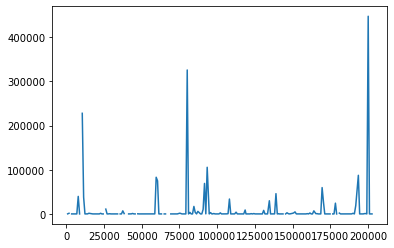

In [12]:
df_new.loc[(df_new.date > '2022-07-16') & (df_new.date < '2022-07-18')]['new_cases'].plot();

In [13]:
df_newest = df_new.loc[(df_new.date > '2022-07-16') & (df_new.date < '2022-07-18')]

In [14]:
df_newest.head()

,date,new_cases,new_deaths,new_vaccinations,location,continent
874,2022-07-17,127.0,1.0,NaN,Afghanistan,Asia
1763,2022-07-17,1447.0,10.0,NaN,Africa,NaN
2640,2022-07-17,NaN,0.0,NaN,Albania,Europe
3517,2022-07-17,21.0,0.0,NaN,Algeria,Africa
4388,2022-07-17,0.0,0.0,NaN,Andorra,Europe


### 1.Soru a-) new cases


In [15]:
df_sorted_newest = df_newest.sort_values(['new_cases'], ascending = [False]) 
print(df_sorted_newest [:3]) 

              date  new_cases  new_deaths  new_vaccinations     location  \
200100  2022-07-17   447298.0       708.0               NaN        World   
80131   2022-07-17   325698.0       391.0               NaN  High income   
10548   2022-07-17   227651.0       292.0               NaN         Asia   

       continent  
200100       NaN  
80131        NaN  
10548        NaN  


In [16]:
df_newest_top_three = df_sorted_newest['location']

### En fazla yeni vakanın yaşandığı 3 ülke

In [17]:
print(df_newest_top_three[:3])

200100          World
80131     High income
10548            Asia
Name: location, dtype: object


### 1.Soru a-) new_deaths

In [18]:
df_sort_deaths = df_newest.sort_values(['new_deaths'], ascending = [False]) 
print(df_sort_deaths [:3]) 

              date  new_cases  new_deaths  new_vaccinations     location  \
200100  2022-07-17   447298.0       708.0               NaN        World   
80131   2022-07-17   325698.0       391.0               NaN  High income   
10548   2022-07-17   227651.0       292.0               NaN         Asia   

       continent  
200100       NaN  
80131        NaN  
10548        NaN  


In [19]:
df_deaths_top_three = df_sort_deaths['location']

### En fazla vefatın olduğu 3 ülke

In [20]:
print(df_deaths_top_three[:3])

200100          World
80131     High income
10548            Asia
Name: location, dtype: object


### 1.Soru a-) new_vaccinations

In [21]:
df_sort_vacci = df_newest.sort_values(['new_vaccinations'], ascending = [False]) 
print(df_sort_vacci [:3]) 

             date  new_cases  new_deaths  new_vaccinations    location  \
38326  2022-07-17      678.0         0.0          493000.0       China   
93360  2022-07-17   105538.0        17.0          239804.0       Japan   
15804  2022-07-17      900.0         4.0          124607.0  Bangladesh   

      continent  
38326      Asia  
93360      Asia  
15804      Asia  


In [22]:
df_vacci_top_three = df_sort_vacci['location']

### En fazla aşılamanın olduğu 3 ülke

In [23]:
print(df_vacci_top_three[:3])

38326         China
93360         Japan
15804    Bangladesh
Name: location, dtype: object


### 1.Soru b-) Kıta-Ülke-En fazla yeni vaka

In [24]:
#gkk = df_newest.groupby(['continent'])

# df_newest.groupby(["continent"]).head()

gkk = df_newest.groupby(['continent', 'new_cases'])
  
# Print the first value in each group
gkk.first()

date  new_deaths  new_vaccinations    location
continent     new_cases                                                      
Africa        0.0        2022-07-17         0.0               NaN      Angola
              2.0        2022-07-17         0.0               NaN        Mali
              9.0        2022-07-17         0.0               NaN  Cape Verde
              14.0       2022-07-17         0.0               NaN     Eritrea
              18.0       2022-07-17         0.0               NaN  Mozambique
...                             ...         ...               ...         ...
South America 672.0      2022-07-17         1.0               NaN   Venezuela
              1440.0     2022-07-17         3.0               NaN     Bolivia
              6920.0     2022-07-17        47.0            1488.0       Chile
              10852.0    2022-07-17        55.0           74709.0      Brazil
              39656.0    2022-07-17        57.0            8835.0   Argentina

[86 rows x 4 columns]

In [25]:
# df_sorted_newest_conti = gkk.sort_values(['new_cases'], ascending = [False]) 
#print(df_sorted_newest_conti [:3]) 

df2=df_newest.sort_values(['continent','new_cases'],ascending=False).groupby('continent').head(1)


### Her kıtanın en fazla yeni vaka olan ülesi

In [26]:
df2

,date,new_cases,new_deaths,new_vaccinations,location,continent
7878,2022-07-17,39656.0,57.0,8835.0,Argentina,South America
11455,2022-07-17,37787.0,26.0,3327.0,Australia,Oceania
191847,2022-07-17,18811.0,27.0,NaN,United States,North America
91587,2022-07-17,68996.0,79.0,5691.0,Italy,Europe
93360,2022-07-17,105538.0,17.0,239804.0,Japan,Asia
124285,2022-07-17,787.0,6.0,NaN,Morocco,Africa
200100,2022-07-17,447298.0,708.0,NaN,World,NaN


## 1.Soru c-) Asya-Avrupa-Afrika- new vacc.

In [27]:
df2=df_new.sort_values(['continent','new_cases'],ascending=False).groupby('continent').head(1)
df2.head()

,date,new_cases,new_deaths,new_vaccinations,location,continent
25985,2022-02-03,287149.0,1000.0,1374578.0,Brazil,South America
11269,2022-01-12,175271.0,57.0,345035.0,Australia,Oceania
191659,2022-01-10,1383889.0,2014.0,1259249.0,United States,North America
69126,2022-03-31,527487.0,596.0,181554.0,Germany,Europe
170337,2022-03-16,621317.0,429.0,53798.0,South Korea,Asia


In [28]:
df_last_question = df2[['continent', 'new_vaccinations','date']]
df_last_question.head()

,continent,new_vaccinations,date
25985,South America,1374578.0,2022-02-03
11269,Oceania,345035.0,2022-01-12
191659,North America,1259249.0,2022-01-10
69126,Europe,181554.0,2022-03-31
170337,Asia,53798.0,2022-03-16


### Avrupa,  Asya ve Afrika kıtaları için, günlük aşı sayıları(new_vaccinations)

In [36]:
grafikLast = df_last_question.loc[(df_last_question['continent'] == 'Europe') |
                                  (df_last_question['continent'] == 'Africa') |
                                  (df_last_question['continent'] == 'Asia')]

grafikLast.head()

,continent,new_vaccinations,date
69126,Europe,181554.0,2022-03-31
170337,Asia,53798.0,2022-03-16
25164,Africa,NaN,2022-03-30


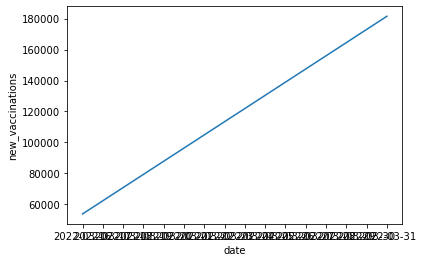

In [44]:
#sns.lineplot(x=grafikLast["date"], y=grafikLast["new_vaccinations"],hue="continent", data=grafikLast)

ax = sns.lineplot(x=df['date'], y=grafikLast['new_vaccinations'])


<AxesSubplot:xlabel='date', ylabel='new_vaccinations'>

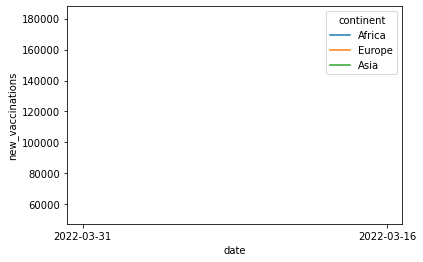

In [46]:

sns.lineplot(x=df_last_question["date"], y=df_last_question["new_vaccinations"],hue=grafikLast["continent"], data=df_last_question)

In [256]:
grafik1 = df_last_question.loc[(df_last_question['continent'] == 'Europe')]
grafik1

,continent,new_vaccinations,date
91587,Europe,5691.0,2022-07-17


In [164]:
grafik2 = df_last_question.loc[(df_last_question['continent'] == 'Asia')]

In [254]:
grafik2

,continent,new_vaccinations
93360,Asia,239804.0
170460,Asia,237.0
178369,Asia,NaN


In [165]:
grafik3 = df_last_question.loc[(df_last_question['continent'] == 'Africa')]

In [255]:
grafik3

,continent,new_vaccinations
124285,Africa,NaN
110747,Africa,NaN
43018,Africa,NaN


## 2. Soru- Telekom Veriseti

In [186]:
df_tel=pd.read_csv('churn_df.csv')

### 2.Soru a-)

In [187]:
df_tel.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [215]:
X=df_tel[["total_day_charge","total_eve_charge"]]

In [216]:
X.head()

,total_day_charge,total_eve_charge
0,45.07,16.78
1,27.47,16.62
2,41.38,10.30
3,50.90,5.26
4,28.34,12.61


In [238]:
X.shape

(3333, 2)

In [219]:
y=df_tel["churn"]

In [220]:
y.shape

(3333,)

In [221]:
knn=KNeighborsClassifier(n_neighbors=6)

In [222]:
knn

KNeighborsClassifier(n_neighbors=6)

In [223]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

In [224]:
X_new=np.array([[30,17.5],
               [107,24.1],
               [213,10.9]])from sklearn.model_selection import train_test_split

In [225]:
y_pred=knn.predict(X_new)

In [228]:
print(knn.score)

<bound method ClassifierMixin.score of KNeighborsClassifier(n_neighbors=6)>


In [229]:
from sklearn.model_selection import train_test_split

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=1,
                                                    stratify=y)

In [231]:
knn=KNeighborsClassifier(n_neighbors=6)

In [232]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

### Eğitim verisi doğruluğu

In [233]:
knn.score(X_train,y_train)

0.8864123446206601

### Test Verisi Doğruluğu

In [234]:
knn.score(X_test,y_test)

0.864

## 2. Soru b-)

 Daha iyi bir soru ile optimum k değerini nasıl bulabiliriz. 
 Bunun için bir aralık için tüm k değerleri için modelimizi eğitim accuracy score üzerinden bir karşılaştırma yapıp olası en iyi k değeri bulunabilir.

 k değerinin 1-25 arasındaki durumlarını inceleyelim.

In [241]:
Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.808, 0.868, 0.862, 0.867, 0.868, 0.864, 0.869, 0.87 , 0.871,
       0.87 , 0.868, 0.871, 0.874, 0.874, 0.875, 0.874, 0.877, 0.874,
       0.876, 0.875, 0.875, 0.873, 0.875, 0.872])

In [240]:
print( "En yüksek Doğruluk oranını =", mean_acc.max(), "K=", mean_acc.argmax()+1,"olduğunda elde ettik.") 

En yüksek Doğruluk oranını = 0.877 K= 17 olduğunda elde ettik.
